In [1]:
# 1. Pick a dataset to work with. 
# 2. Clone / download the dataset
# 3. Undesrand and describe what the dataset does and what is the goal which is necessary to accomplish
# 4. Divide the data to the training and testing set. 
#    At start lets start with istribution 60-40%. This ratio should be tweaked with to find and optimal solution
# 5. Pick right activation function and test which one is the most suitable for the problem in hand
# 6. Do a proper visualization od the data we gathered while whole process:
# 6a. Error
# 6b. Accuracy
# 6c. Weights (? - Depends on the neural network and it complexity)
# 6d. Struncture of the network (either visual or the Keras print visualization of the neural network thru "description")

## 1. Ziskavanie dát 

In [2]:
# importing keras library to work with the Neural Networks design
import keras
# importing padnas to work with files / csv-s containing the datasets
import pandas as pd
# importing numpy lib for faster manipulation with data supporting math 
import numpy as np

# lets prepare both of them and  later we will see which one is better for visualization of the data
import seaborn as sns
import matplotlib as plt

# importing the lib to help to split testing and training data which will be later used
from sklearn.model_selection import train_test_split
from sklearn import metrics
import sklearn.preprocessing

In [38]:
# načítanie datasetu do dataframe z cvs file
# povodný súbor pochádza z https://www.kaggle.com/murderaccountability/homicide-reports
# a obsahuje správy o vraždách za roky 1980 - 2014 z rôznych štátov USA
dataset = pd.read_csv("database.csv", dtype={
                                             "Record ID": int,
                                             "Agency Code": str,
                                             "Agency Name": str,
                                             "Agency Type": str,
                                             "City": str,
                                             "State": str,
                                             "Year": int,
                                             "Month": str,
                                             "Incident": int,
                                             "Crime Type": str,
                                             "Crime Solved": str,
                                             "Victim Sex": str,
                                             "Victim Age": int,
                                             "Victim Race": str,
                                             "Victim Ethnicity": str,
                                             "Perpetrator Sex": str,
                                             "Perpetrator Age": int,
                                             "Perpetrator Race": str,
                                             "Perpetrator Ethnicity": str,
                                             "Relationship": str,
                                             "Weapon": str,
                                             "Victim Count": int,
                                             "Perpetrator Count": int,
                                             "Record Source": str
                                                                 })

ValueError: invalid literal for int() with base 10: ' '

In [39]:
# zobrazte prvých 5 riadkov pre rýchly náhľad ako dáta vyzerajú
dataset.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI


### Vlastnosti datasetu
<ol>
    <li>Record ID: Číslo záznamu vraždy </li>
    <li>Agency Code: Kódové meno zastupiteľstva, ktorá vyšetrovala daný zločin. </li>
    <li>Agency Name: Plné meno zastupiteľstva, ktorá vyšetrovala daný zločin. </li>
    <li>Agency Type: Typ zastupiteľstva: a. 'Municipal Police', b. 'County Police', c. 'State Police', d. 'Sheriff',
       e. 'Special Police', f. 'Regional Police', g. 'Tribal Police'</li>
    <li>City: Mesto, v ktorom sa stal zločin. </li>
    <li>State: Štát, v ktotom sa zločin odohral. </li>
    <li>Year: Rok spáchaného zločinu, z časového obdobia od roku 1980 - 2014 </li>
    <li>Month: Mesiac, v ktorom sa zločin stal. Formát je January - December  </li>
    <li>Incident: Číslená hodnota koľko zločinov sa stalo za dané obobie. Napríklad za Marec 1980 bola spáchaná vražda v Aliaške druhý krát. Hodnota bude 2. </li>
    <li>Crime type: Klasfikuje čin do dvoch kategórií: 'Murder or Manslaughter' == 'Vražda alebo Zabitie' a 'Manslaughter by Negligence' == 'Zabitie z nedbanlivosti' </li>
    <li>Crime Solved: Klasifikuje, či bol zločiť vyrierený. Bud 'Yes' == 'Áno' alebo 'No' == 'Nie' </li>
    <li>Victim Sex: Klasifikácia pohlavia obete. Rozdelenie do 3 kategórií: a. 'Man' == 'Muž', b. 'Female' == 'Žena', c.'Unknown' == 'Neidentifikované' </li>
    <li>Victim Age: Vek obete. </li>
    <li>Victim Race: Krasifikácia posla rasy obete. Rozdenený do 5 kategórií. a.'Native American/Alaska Native' b. 'White' c.'Black' d. 'Unknown' e. 'Asian/Pacific Islander' </li>
    <li>Victim Ethnicity: Kategorizácia etnickej príslušnosti do 3 kategórií. a. 'Unknown', b. 'Not Hispanic', c. 'Hispanic'  </li>
    <li>Perpetrator Sex: Klasifikácia pohlavia páchteľa. Rozdelenie do 3 kategórií: a. 'Man' == 'Muž', b. 'Female' == 'Žena', c. 'Unknown' == 'Neidentifikované' </li>
    <li>Perpetrator Age:  Vek páchateľa. Ak vek páchateľa je neznámy, záznam obsahuje nulu. </li>
    <li>Perpetrator Race: Krasifikácia posla rasy páchateľa. Rozdenený do 5 kategórií. a.'Native American/Alaska Native' b. 'White' c.'Black' d. 'Unknown' e. 'Asian/Pacific Islander' </li>
    <li>Perpetrator Ethnicity: Kategorizácia etnickej príslušnosti do 3 kategórií. a. 'Unknown', b. 'Not Hispanic', c. 'Hispanic' </li>
    <li>Relationship: Klasifikikácia vsťahu medzi obeťou a páchateľom. 28 rôznych kategórií. </li>
    <li>Weapon: Klasifikácia podľa zbrane, ktorá bola použitá pri čine. 17 rôznych kategórií. </li>
    <li>Victim Count: Počet obetí. </li>
    <li>Perpetrator Count: Počet páchateľov. </li>
    <li>Record Source: Klasifikácia zdroja informácií. Informácie pochádzajú z 2 zdrojov: a. 'FBI' == 'Federal Bureau of Investigation' b. 'FIOA' == 'Freedom of Information Act' </li>
</ol>

In [5]:
# tvar DataFrame (riadky, stĺpce)
# porozumieť množstvu dát, s ktorými pracujeme
# môžeme vidieť, že náš datasetmá tvar matice obsahujú 638 454 riadkov a 24 stlpcov
dataset.shape

(638454, 24)

In [6]:
# popis dát
# dôležitou informáciou je, že náš dataset je kompletný, tj neosasuje nenulove hodnoty 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Record ID              638454 non-null  int64 
 1   Agency Code            638454 non-null  object
 2   Agency Name            638454 non-null  object
 3   Agency Type            638454 non-null  object
 4   City                   638454 non-null  object
 5   State                  638454 non-null  object
 6   Year                   638454 non-null  int64 
 7   Month                  638454 non-null  object
 8   Incident               638454 non-null  int64 
 9   Crime Type             638454 non-null  object
 10  Crime Solved           638454 non-null  object
 11  Victim Sex             638454 non-null  object
 12  Victim Age             638454 non-null  int64 
 13  Victim Race            638454 non-null  object
 14  Victim Ethnicity       638454 non-null  object
 15  

In [7]:
# skontrolujte, či existujú nulové hodnoty
dataset.isna().sum()

Record ID                0
Agency Code              0
Agency Name              0
Agency Type              0
City                     0
State                    0
Year                     0
Month                    0
Incident                 0
Crime Type               0
Crime Solved             0
Victim Sex               0
Victim Age               0
Victim Race              0
Victim Ethnicity         0
Perpetrator Sex          0
Perpetrator Age          0
Perpetrator Race         0
Perpetrator Ethnicity    0
Relationship             0
Weapon                   0
Victim Count             0
Perpetrator Count        0
Record Source            0
dtype: int64

In [8]:
# Zobrazime si ake s ak7mi datami pracujeme, podla specifikacie potrebujeme si prerozdelit dataset 
# na kategoricke a numericke premenne
dataset.dtypes

Record ID                 int64
Agency Code              object
Agency Name              object
Agency Type              object
City                     object
State                    object
Year                      int64
Month                    object
Incident                  int64
Crime Type               object
Crime Solved             object
Victim Sex               object
Victim Age                int64
Victim Race              object
Victim Ethnicity         object
Perpetrator Sex          object
Perpetrator Age          object
Perpetrator Race         object
Perpetrator Ethnicity    object
Relationship             object
Weapon                   object
Victim Count              int64
Perpetrator Count         int64
Record Source            object
dtype: object

In [9]:
# rozdelime si datasety na numericke a kategoricke
numerical_cols_dataset = dataset.select_dtypes(['int64','float64','datetime64[ns, UTC]'])
cathegorical_cols_dataset = dataset.select_dtypes(['object'])

In [10]:
# we can see that we have some odd data here and that in one month there have been 999 events of murder and age f victim was 998
dataset.describe()

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
count,638454.00000,638454.000000,638454.000000,638454.000000,638454.000000,638454.000000
mean,319227.50000,1995.801102,22.967924,35.033512,0.123334,0.185224
std,184305.93872,9.927693,92.149821,41.628306,0.537733,0.585496
min,1.00000,1980.000000,0.000000,0.000000,0.000000,0.000000
25%,159614.25000,1987.000000,1.000000,22.000000,0.000000,0.000000
50%,319227.50000,1995.000000,2.000000,30.000000,0.000000,0.000000
75%,478840.75000,2004.000000,10.000000,42.000000,0.000000,0.000000
max,638454.00000,2014.000000,999.000000,998.000000,10.000000,10.000000


array([[<AxesSubplot:title={'center':'Record ID'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Incident'}>,
        <AxesSubplot:title={'center':'Victim Age'}>],
       [<AxesSubplot:title={'center':'Victim Count'}>,
        <AxesSubplot:title={'center':'Perpetrator Count'}>]], dtype=object)

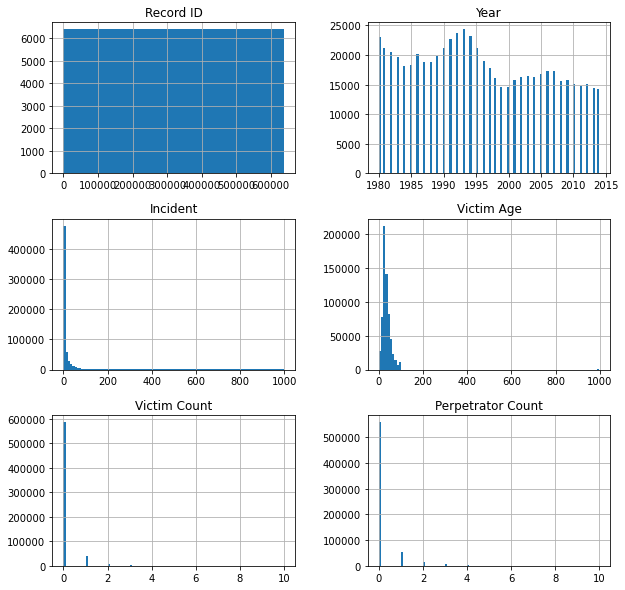

In [11]:
numerical_cols_dataset.hist(figsize = (10,10),bins=100)

In [12]:
numerical_cols_dataset

,Record ID,Year,Incident,Victim Age,Victim Count,Perpetrator Count
0,1,1980,1,14,0,0
1,2,1980,1,43,0,0
2,3,1980,2,30,0,0
3,4,1980,1,43,0,0
4,5,1980,2,30,0,1
...,...,...,...,...,...,...
638449,638450,2014,1,30,0,0
638450,638451,2014,1,62,0,0
638451,638452,2014,1,0,0,0
638452,638453,2014,1,55,0,1


In [13]:
cathegorical_cols_dataset

,Agency Code,Agency Name,Agency Type,City,State,Month,Crime Type,Crime Solved,Victim Sex,Victim Race,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Record Source
0,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,January,Murder or Manslaughter,Yes,Male,Native American/Alaska Native,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,FBI
1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,March,Murder or Manslaughter,Yes,Male,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,FBI
2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,March,Murder or Manslaughter,No,Female,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,FBI
3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,April,Murder or Manslaughter,Yes,Male,White,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,FBI
4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,April,Murder or Manslaughter,No,Female,Native American/Alaska Native,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,FBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
638449,WY01500,Park County,Sheriff,Park,Wyoming,January,Murder or Manslaughter,No,Male,White,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Handgun,FBI
638450,WY01700,Sheridan County,Sheriff,Sheridan,Wyoming,June,Murder or Manslaughter,Yes,Male,White,Unknown,Male,57,White,Unknown,Acquaintance,Handgun,FBI
638451,WY01701,Sheridan,Municipal Police,Sheridan,Wyoming,September,Murder or Manslaughter,Yes,Female,Asian/Pacific Islander,Unknown,Female,22,Asian/Pacific Islander,Unknown,Daughter,Suffocation,FBI
638452,WY01800,Sublette County,Sheriff,Sublette,Wyoming,December,Murder or Manslaughter,Yes,Male,White,Not Hispanic,Male,31,White,Not Hispanic,Stranger,Knife,FBI


## 2. Pochopenie a Vizualizácia dát

In [14]:
cathegorical_cols_dataset['Agency Code'].value_counts()

NY03030    38416
CA01942    23663
ILCPD00    21331
MI82349    17206
TXHPD00    12881
           ...  
WV00401        1
IL01008        1
AL05803        1
WV01103        1
MI39799        1
Name: Agency Code, Length: 12003, dtype: int64

In [15]:
cathegorical_cols_dataset['Agency Name'].value_counts()

New York                    38416
Los Angeles                 29007
Chicago                     21331
Detroit                     17206
Houston                     13046
                            ...  
Parkesburg                      1
Andrew County                   1
Bledsoe County                  1
Surf City                       1
Coastal Carolina Univers        1
Name: Agency Name, Length: 9216, dtype: int64

In [16]:
cathegorical_cols_dataset['Agency Type'].value_counts()

Municipal Police    493026
Sheriff             105322
County Police        22693
State Police         14235
Special Police        2889
Regional Police        235
Tribal Police           54
Name: Agency Type, dtype: int64

In [18]:
cathegorical_cols_dataset['City'].value_counts()

Los Angeles    44511
New York       38431
Cook           22383
Wayne          19904
Harris         16331
               ...  
Ida                1
Hanson             1
Foard              1
Gentry             1
Jo Daviess         1
Name: City, Length: 1782, dtype: int64

In [19]:
cathegorical_cols_dataset['State'].value_counts()

California              99783
Texas                   62095
New York                49268
Florida                 37164
Michigan                28448
Illinois                25871
Pennsylvania            24236
Georgia                 21088
North Carolina          20390
Louisiana               19629
Ohio                    19158
Maryland                17312
Virginia                15520
Tennessee               14930
Missouri                14832
New Jersey              14132
Arizona                 12871
South Carolina          11698
Indiana                 11463
Alabama                 11376
Oklahoma                 8809
Washington               7815
District of Columbia     7115
Arkansas                 6947
Colorado                 6593
Kentucky                 6554
Mississippi              6546
Wisconsin                6191
Massachusetts            6036
Nevada                   5553
Connecticut              4896
New Mexico               4272
Oregon                   4217
Minnesota 

In [20]:
cathegorical_cols_dataset['Month'].value_counts()

July         58696
August       58072
December     55187
September    54117
June         53662
October      53650
May          53394
January      52928
March        51444
April        51209
November     50016
February     46079
Name: Month, dtype: int64

In [21]:
cathegorical_cols_dataset['Crime Type'].value_counts()

Murder or Manslaughter        629338
Manslaughter by Negligence      9116
Name: Crime Type, dtype: int64

In [22]:
cathegorical_cols_dataset['Crime Solved'].value_counts()

Yes    448172
No     190282
Name: Crime Solved, dtype: int64

In [23]:
cathegorical_cols_dataset['Victim Sex'].value_counts()

Male       494125
Female     143345
Unknown       984
Name: Victim Sex, dtype: int64

In [24]:
cathegorical_cols_dataset['Victim Race'].value_counts()

White                            317422
Black                            299899
Asian/Pacific Islander             9890
Unknown                            6676
Native American/Alaska Native      4567
Name: Victim Race, dtype: int64

In [25]:
cathegorical_cols_dataset['Victim Ethnicity'].value_counts()

Unknown         368303
Not Hispanic    197499
Hispanic         72652
Name: Victim Ethnicity, dtype: int64

In [26]:
cathegorical_cols_dataset['Perpetrator Sex'].value_counts()

Male       399541
Unknown    190365
Female      48548
Name: Perpetrator Sex, dtype: int64

In [27]:
cathegorical_cols_dataset['Perpetrator Race'].value_counts()          

White                            218243
Black                            214516
Unknown                          196047
Asian/Pacific Islander             6046
Native American/Alaska Native      3602
Name: Perpetrator Race, dtype: int64

In [28]:
cathegorical_cols_dataset['Perpetrator Ethnicity'].value_counts()

Unknown         446410
Not Hispanic    145172
Hispanic         46872
Name: Perpetrator Ethnicity, dtype: int64

In [29]:
cathegorical_cols_dataset['Relationship'].value_counts()

Unknown                 273013
Acquaintance            126018
Stranger                 96593
Wife                     23187
Friend                   21945
Girlfriend               16465
Son                       9904
Family                    9535
Husband                   8803
Daughter                  7539
Boyfriend                 7302
Neighbor                  6294
Brother                   5514
Father                    4361
Mother                    4248
In-Law                    3637
Common-Law Wife           2477
Ex-Wife                   1973
Common-Law Husband        1954
Boyfriend/Girlfriend      1383
Stepfather                1360
Sister                    1292
Stepson                   1170
Stepdaughter               754
Ex-Husband                 629
Employer                   509
Employee                   384
Stepmother                 211
Name: Relationship, dtype: int64

In [30]:
cathegorical_cols_dataset['Weapon'].value_counts()

Handgun          317484
Knife             94962
Blunt Object      67337
Firearm           46980
Unknown           33192
Shotgun           30722
Rifle             23347
Strangulation      8110
Fire               6173
Suffocation        3968
Gun                2206
Drugs              1588
Drowning           1204
Explosives          537
Poison              454
Fall                190
Name: Weapon, dtype: int64

In [31]:
cathegorical_cols_dataset['Record Source'].value_counts()

FBI     616647
FOIA     21807
Name: Record Source, dtype: int64

## 3. Ciele práce

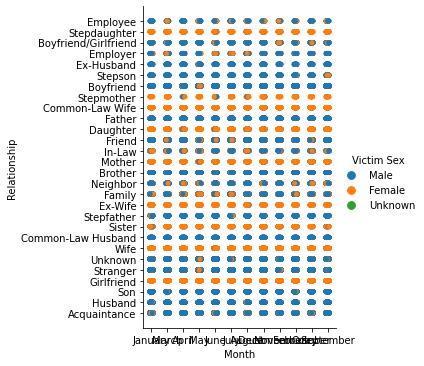